<a href="https://colab.research.google.com/github/PadalaSiddharth/Fraud-Detection/blob/main/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Fraud detection

---



Installing and importing libraries


In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot
%matplotlib inline

Loading the data set

In [ ]:
df=pd.read_csv("Fraud.csv")
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
804826,40,PAYMENT,1317.96,C1909675661,63425.0,62107.04,M605824037,0.00,0.00,0.0,0.0
804827,40,CASH_OUT,167794.06,C738389281,15648.0,0.00,C1474439558,104352.52,856890.31,0.0,0.0
804828,40,CASH_OUT,252941.29,C1173720417,0.0,0.00,C1118356505,1660654.95,1913596.24,0.0,0.0
804829,40,CASH_OUT,30816.45,C779734124,30153.0,0.00,C1840453957,4852841.83,4883658.29,0.0,0.0


Handling null values and oultiers


In [ ]:
df = df.dropna()

In [ ]:
from scipy import stats
z_scores = np.abs(stats.zscore(df[['amount', 'oldbalanceOrg', 'newbalanceOrig']]))
df_cleaned = df[(z_scores < 3).all(axis=1)]

In [ ]:
import numpy as np
from scipy import stats

# Calculate z-scores and assign using .loc to avoid SettingWithCopyWarning
df.loc[:, 'z_score'] = np.abs(stats.zscore(df['amount'].fillna(0)))

# Define threshold
threshold = 3

# Identify outliers
outliers = df[df['z_score'] > threshold]
print(outliers)

# Filter the DataFrame to keep only rows with z_score <= threshold
df = df.loc[df['z_score'] <= threshold]

# Print the filtered DataFrame
df

<ipython-input-16-fb186cdddc0e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'z_score'] = np.abs(stats.zscore(df['amount'].fillna(0)))


        step      type      amount     nameOrig  oldbalanceOrg  \
85         1  TRANSFER  1505626.01   C926859124           0.00   
89         1  TRANSFER  1429051.47  C1520267010           0.00   
94         1  TRANSFER  1724887.05  C1495608502           0.00   
358        1  TRANSFER  1538200.39   C476579021           0.00   
359        1  TRANSFER  2421578.09   C106297322           0.00   
...      ...       ...         ...          ...            ...   
804682    40  TRANSFER  1100930.28   C844819391       12661.00   
804740    40  TRANSFER  1737946.08   C164056715           0.00   
804744    40  TRANSFER  1200195.83   C372491863           0.00   
804746    40  TRANSFER  1735248.14   C432077532           0.00   
804754    40  TRANSFER  1432401.30   C122288001      439472.79   

        newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
85                 0.0   C665576141        29031.00      5515763.34      0.0   
89                 0.0  C1590550415      204154

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,z_score
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0.0,0.0,0.576112
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0.0,0.0,0.605940
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1.0,0.0,0.612235
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1.0,0.0,0.612235
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0.0,0.0,0.569274
...,...,...,...,...,...,...,...,...,...,...,...,...
804825,40,CASH_OUT,459698.82,C1409790763,8015.0,0.00,C719711595,0.00,1029563.36,0.0,0.0,1.106350
804826,40,PAYMENT,1317.96,C1909675661,63425.0,62107.04,M605824037,0.00,0.00,0.0,0.0,0.607983
804827,40,CASH_OUT,167794.06,C738389281,15648.0,0.00,C1474439558,104352.52,856890.31,0.0,0.0,0.014634
804828,40,CASH_OUT,252941.29,C1173720417,0.0,0.00,C1118356505,1660654.95,1913596.24,0.0,0.0,0.333082


In [ ]:
from scipy import stats

# alculate z-scores and assign them using .loc
df.loc[:, 'z_score'] = stats.zscore(df['amount'].fillna(0))

# Define a threshold for outliers
thresholdC = 3

# Identify outliers based on z-scores
outliers_z_score = df[df['z_score'].abs() > threshold]

# Print outliers
print("Transactions identified as outliers based on Z-score:")
print(outliers_z_score[['amount', 'z_score']])

Transactions identified as outliers based on Z-score:
           amount   z_score
88      761507.39  3.850535
95      710544.77  3.536685
132     679502.24  3.345511
289     691738.36  3.420867
373     928722.69  4.880320
...           ...       ...
804742  723360.18  3.615608
804743  818614.19  4.202223
804747  964929.79  5.103299
804761  769659.98  3.900742
804767  701423.68  3.480513

[14999 rows x 2 columns]


In [ ]:
import numpy as np
from scipy import stats

# Calculate z-scores and assign using .loc to avoid SettingWithCopyWarning
df.loc[:, 'z_score'] = np.abs(stats.zscore(df['amount'].fillna(0)))

# Define threshold
threshold = 3

# Identify outliers
outliers = df[df['z_score'] > threshold]
print(outliers)

# Filter the DataFrame to keep only rows with z_score <= threshold
df = df.loc[df['z_score'] <= threshold]

# Print the filtered DataFrame
df

        step      type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
88         1  TRANSFER  761507.39   C412788346           0.00            0.00   
95         1  TRANSFER  710544.77   C835773569           0.00            0.00   
132        1  TRANSFER  679502.24   C722417467         290.00            0.00   
289        1  CASH_OUT  691738.36  C1514214932           0.00            0.00   
373        1  TRANSFER  928722.69  C1563053805           0.00            0.00   
...      ...       ...        ...          ...            ...             ...   
804742    40  TRANSFER  723360.18  C1139046729           0.00            0.00   
804743    40  TRANSFER  818614.19   C632518524           0.00            0.00   
804747    40  TRANSFER  964929.79   C670463503           0.00            0.00   
804761    40  TRANSFER  769659.98  C1136154262      342707.31            0.00   
804767    40   CASH_IN  701423.68  C1753923673         419.00       701842.68   

           nameDest  oldbal

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,z_score
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0.0,0.0,0.778563
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0.0,0.0,0.827679
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1.0,0.0,0.838046
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1.0,0.0,0.838046
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0.0,0.0,0.767303
...,...,...,...,...,...,...,...,...,...,...,...,...
804825,40,CASH_OUT,459698.82,C1409790763,8015.0,0.00,C719711595,0.00,1029563.36,0.0,0.0,1.991866
804826,40,PAYMENT,1317.96,C1909675661,63425.0,62107.04,M605824037,0.00,0.00,0.0,0.0,0.831044
804827,40,CASH_OUT,167794.06,C738389281,15648.0,0.00,C1474439558,104352.52,856890.31,0.0,0.0,0.194189
804828,40,CASH_OUT,252941.29,C1173720417,0.0,0.00,C1118356505,1660654.95,1913596.24,0.0,0.0,0.718563


In [ ]:
import numpy as np
from scipy import stats

# Calculate z-scores and assign using .loc to avoid SettingWithCopyWarning
df.loc[:, 'z_score'] = np.abs(stats.zscore(df['amount'].fillna(0)))

# Define threshold
threshold = 3

# Identify outliers
outliers = df[df['z_score'] > threshold]
print(outliers)

# Filter the DataFrame to keep only rows with z_score <= threshold
df = df.loc[df['z_score'] <= threshold]

# Print the filtered DataFrame
df


        step      type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
86         1  TRANSFER  554026.99  C1603696865           0.00             0.0   
93         1  TRANSFER  583848.46  C1839168128           0.00             0.0   
96         1  TRANSFER  581294.26   C843299092           0.00             0.0   
552        1  CASH_OUT  562903.81    C24039137        9045.19             0.0   
695        1  CASH_OUT  596617.87   C466032056           0.00             0.0   
...      ...       ...        ...          ...            ...             ...   
804345    40  TRANSFER  613003.53   C235963318       23057.00             0.0   
804410    40  CASH_OUT  576120.50  C1164873218      364032.00             0.0   
804505    40  CASH_OUT  539362.55  C1787155164       19578.00             0.0   
804513    40  CASH_OUT  541036.71   C800077907         889.00             0.0   
804626    40  CASH_OUT  589182.30  C1883543713           0.00             0.0   

           nameDest  oldbal

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,z_score
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0.0,0.0,0.830562
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0.0,0.0,0.888526
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1.0,0.0,0.900760
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1.0,0.0,0.900760
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0.0,0.0,0.817273
...,...,...,...,...,...,...,...,...,...,...,...,...
804825,40,CASH_OUT,459698.82,C1409790763,8015.0,0.00,C719711595,0.00,1029563.36,0.0,0.0,2.438963
804826,40,PAYMENT,1317.96,C1909675661,63425.0,62107.04,M605824037,0.00,0.00,0.0,0.0,0.892496
804827,40,CASH_OUT,167794.06,C738389281,15648.0,0.00,C1474439558,104352.52,856890.31,0.0,0.0,0.317433
804828,40,CASH_OUT,252941.29,C1173720417,0.0,0.00,C1118356505,1660654.95,1913596.24,0.0,0.0,0.936273


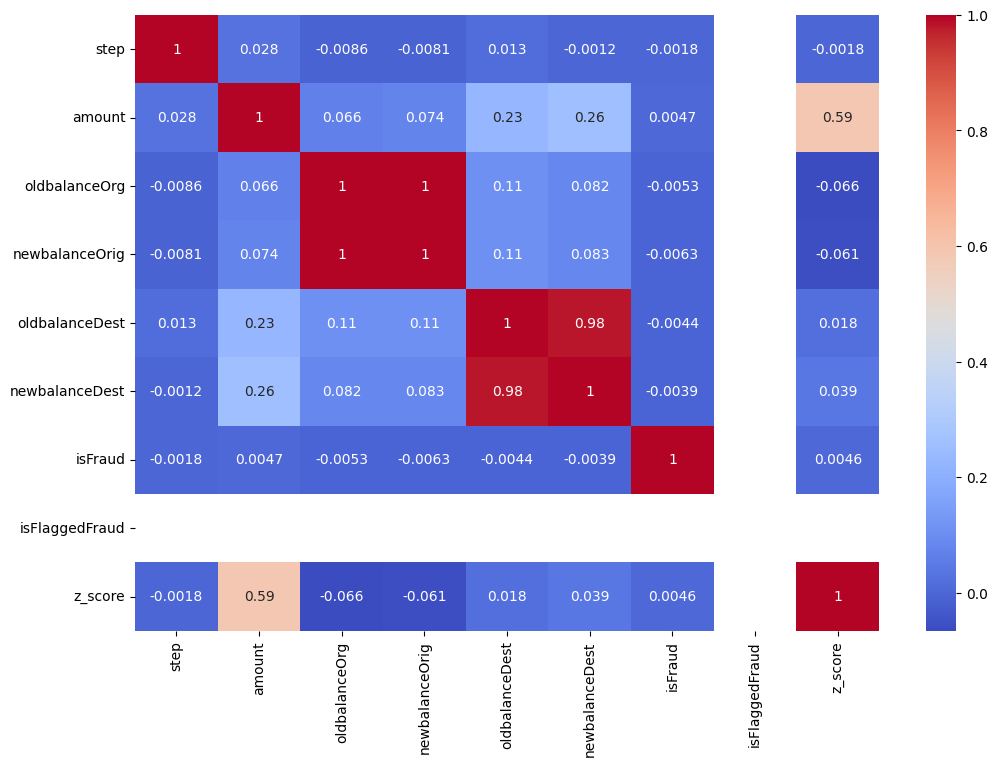

Highly correlated feature pairs (correlation > 0.9):
('oldbalanceOrg', 'newbalanceOrig')
('oldbalanceDest', 'newbalanceDest')


In [ ]:
import matplotlib.pyplot as plt
# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap to visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Identify pairs of features with correlation greater than 0.9
threshold = 0.9
high_corr_features = np.where(np.abs(corr_matrix) > threshold)
high_corr_pairs = [(corr_matrix.index[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_features) if x != y and x < y]

# Print highly correlated pairs
print("Highly correlated feature pairs (correlation > 0.9):")
for pair in high_corr_pairs:
    print(pair)

In [ ]:
df.loc[:, 'balanceOrg_diff'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df.loc[:, 'balanceDest_diff'] = df['oldbalanceDest'] - df['newbalanceDest']

<ipython-input-21-94b410bcda1e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'balanceOrg_diff'] = df['oldbalanceOrg'] - df['newbalanceOrig']
<ipython-input-21-94b410bcda1e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'balanceDest_diff'] = df['oldbalanceDest'] - df['newbalanceDest']


In [ ]:
df.loc[:, 'isMerchant'] = df['nameDest'].apply(lambda x: 1 if x.startswith('M') else 0)


<ipython-input-22-b74e4ef71562>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'isMerchant'] = df['nameDest'].apply(lambda x: 1 if x.startswith('M') else 0)


In [ ]:
# Strip any leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Check column names again
print(df.columns)


df_encoded = pd.get_dummies(df, columns=['type'], drop_first=True)

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'z_score', 'balanceOrg_diff', 'balanceDest_diff',
       'isMerchant'],
      dtype='object')


In [ ]:
df_encoded

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,z_score,balanceOrg_diff,balanceDest_diff,isMerchant,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0.0,0.0,0.830562,9839.64,0.00,1,False,False,True,False
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0.0,0.0,0.888526,1864.28,0.00,1,False,False,True,False
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1.0,0.0,0.900760,181.00,0.00,0,False,False,False,True
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1.0,0.0,0.900760,181.00,21182.00,0,True,False,False,False
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0.0,0.0,0.817273,11668.14,0.00,1,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804825,40,459698.82,C1409790763,8015.0,0.00,C719711595,0.00,1029563.36,0.0,0.0,2.438963,8015.00,-1029563.36,0,True,False,False,False
804826,40,1317.96,C1909675661,63425.0,62107.04,M605824037,0.00,0.00,0.0,0.0,0.892496,1317.96,0.00,1,False,False,True,False
804827,40,167794.06,C738389281,15648.0,0.00,C1474439558,104352.52,856890.31,0.0,0.0,0.317433,15648.00,-752537.79,0,True,False,False,False
804828,40,252941.29,C1173720417,0.0,0.00,C1118356505,1660654.95,1913596.24,0.0,0.0,0.936273,0.00,-252941.29,0,True,False,False,False


Splitting null values

In [ ]:
from sklearn.model_selection import train_test_split

X = df_encoded[['amount', 'balanceOrg_diff', 'balanceDest_diff', 'isMerchant', 'type_TRANSFER', 'type_CASH_OUT']]
y = df_encoded['isFraud']

Model selection Logistic Regression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate the model
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))

Logistic Regression
Accuracy: 0.9995030536048229
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    152870
         1.0       0.00      0.00      0.00        64

    accuracy                           1.00    152934
   macro avg       0.50      0.50      0.50    152934
weighted avg       1.00      1.00      1.00    152934



Logistic Regression Accuracy: 0.9995030536048229
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    152870
         1.0       0.00      0.00      0.00        64

    accuracy                           1.00    152934
   macro avg       0.50      0.50      0.50    152934
weighted avg       1.00      1.00      1.00    152934



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


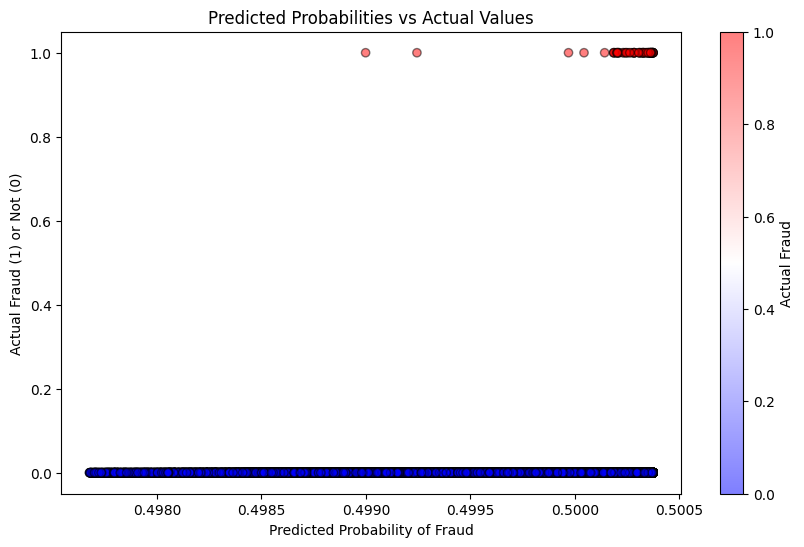

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Initialize and fit the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Standardize features for better visualization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Get predicted probabilities
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

# Plot predicted probabilities versus actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_prob, y_test, alpha=0.5, c=y_test, cmap='bwr', edgecolor='k')
plt.xlabel('Predicted Probability of Fraud')
plt.ylabel('Actual Fraud (1) or Not (0)')
plt.title('Predicted Probabilities vs Actual Values')
plt.colorbar(label='Actual Fraud')
plt.show()

XGB Classifier

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

# Initialize the XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Fit the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("XGBoost Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:25:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classifier
Accuracy: 0.9997580655707691
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    152870
         1.0       0.89      0.48      0.63        64

    accuracy                           1.00    152934
   macro avg       0.94      0.74      0.81    152934
weighted avg       1.00      1.00      1.00    152934



In [ ]:
df_encoded

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,z_score,balanceOrg_diff,balanceDest_diff,isMerchant,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0.0,0.0,0.830562,9839.64,0.00,1,False,False,True,False
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0.0,0.0,0.888526,1864.28,0.00,1,False,False,True,False
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1.0,0.0,0.900760,181.00,0.00,0,False,False,False,True
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1.0,0.0,0.900760,181.00,21182.00,0,True,False,False,False
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0.0,0.0,0.817273,11668.14,0.00,1,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804825,40,459698.82,C1409790763,8015.0,0.00,C719711595,0.00,1029563.36,0.0,0.0,2.438963,8015.00,-1029563.36,0,True,False,False,False
804826,40,1317.96,C1909675661,63425.0,62107.04,M605824037,0.00,0.00,0.0,0.0,0.892496,1317.96,0.00,1,False,False,True,False
804827,40,167794.06,C738389281,15648.0,0.00,C1474439558,104352.52,856890.31,0.0,0.0,0.317433,15648.00,-752537.79,0,True,False,False,False
804828,40,252941.29,C1173720417,0.0,0.00,C1118356505,1660654.95,1913596.24,0.0,0.0,0.936273,0.00,-252941.29,0,True,False,False,False


Random Forest Classifier

Accuracy: 0.9997

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    152870
         1.0       0.69      0.48      0.57        64

    accuracy                           1.00    152934
   macro avg       0.84      0.74      0.78    152934
weighted avg       1.00      1.00      1.00    152934



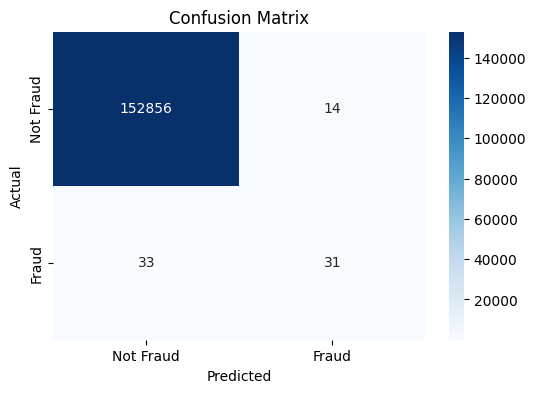

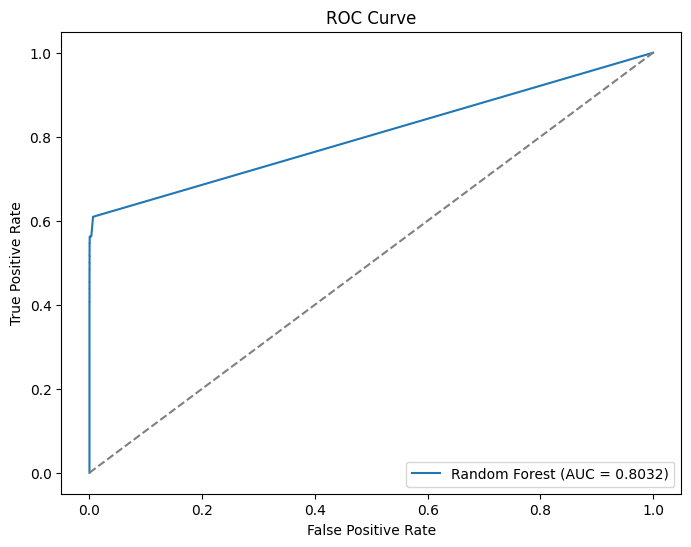

AUC Score: 0.8032


In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data (assuming this part is already done)
# X = df[['amount', 'balanceOrg_diff', 'balanceDest_diff', 'isMerchant', 'type_TRANSFER', 'type_CASH_OUT']]
# y = df['isFraud']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)
y_prob = rf_classifier.predict_proba(X_test)[:, 1]  # Probabilities for ROC/AUC

# 1. Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# 2. Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 3. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 4. ROC Curve and AUC Score
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

print(f"AUC Score: {roc_auc:.4f}")


In [ ]:
df=pd.read_csv("Fraud.csv")
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


ROC Curve and Confusion matrix

Accuracy: 0.9993
ROC AUC Score: 0.9739

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.99      0.42      0.59      1620

    accuracy                           1.00   1272524
   macro avg       1.00      0.71      0.79   1272524
weighted avg       1.00      1.00      1.00   1272524



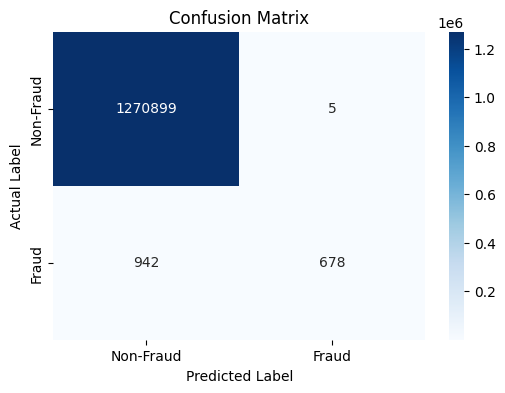

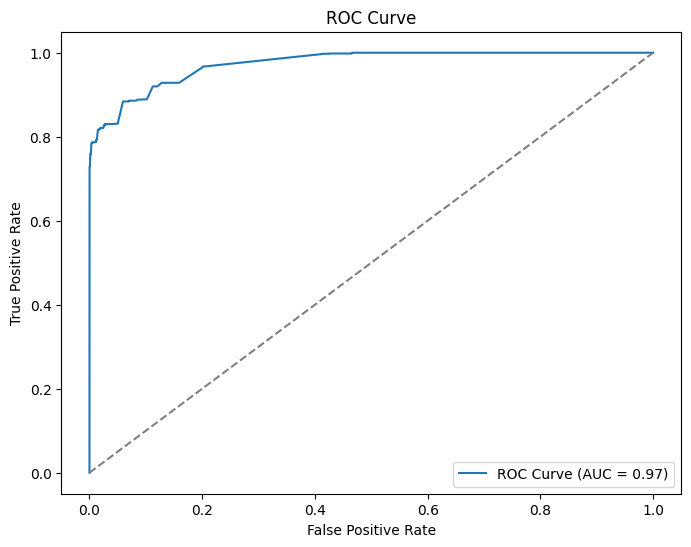

In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_classifier = RandomForestClassifier(n_estimators=100,max_depth=5, random_state=42)


rf_classifier.fit(X_train, y_train)


y_pred = rf_classifier.predict(X_test)
y_prob = rf_classifier.predict_proba(X_test)[:, 1]  # Get the probabilities for ROC AUC
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


Finding the Important Features

            Feature  Importance
1   balanceOrg_diff    0.616930
2  balanceDest_diff    0.260701
0            amount    0.071011
4     type_TRANSFER    0.027547
5     type_CASH_OUT    0.023486
3        isMerchant    0.000325


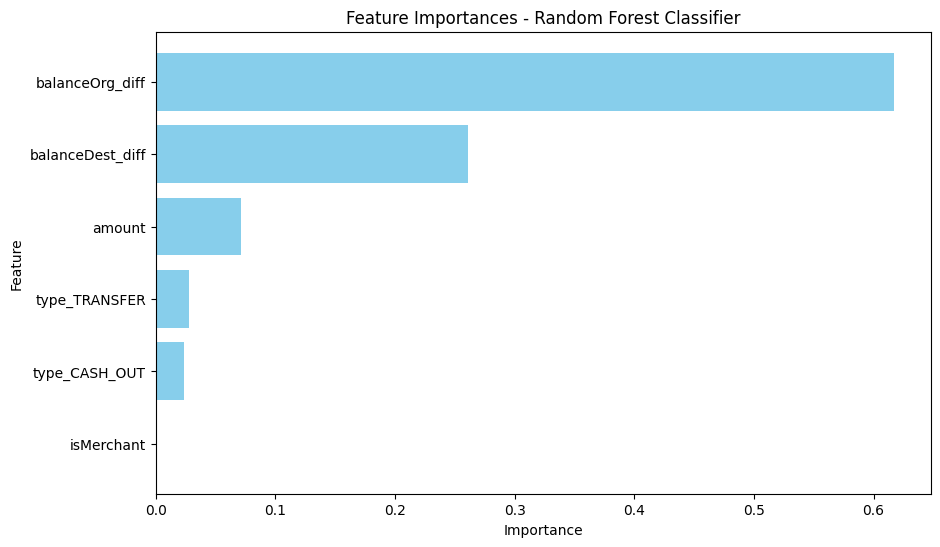

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you've already trained the RandomForestClassifier
# rf_classifier = RandomForestClassifier(random_state=42)
# rf_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame for better readability
features = X.columns  # feature names
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort by importance (descending)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance DataFrame
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances - Random Forest Classifier')
plt.gca().invert_yaxis()  # Invert the y-axis to have the most important feature at the top
plt.show()


In [ ]:
# Ensure predictions are made on the same subset
y_pred_anomalies = rf_classifier.predict(X_test)

# Add fraud alert to the correct DataFrame
df_test = df.loc[X_test.index]
df_test['fraud_alert'] = np.where(y_pred_anomalies == -1, 'Alert: Fraud Suspected', 'No Alert')

# Combine if needed
df_combined = pd.concat([df, df_test[['fraud_alert']]], axis=1)


Anomalies Detection

Potential Fraudulent Transactions:
         step      type      amount     nameOrig  oldbalanceOrg  \
969         1  TRANSFER  1277212.77  C1334405552     1277212.77   
970         1  CASH_OUT  1277212.77   C467632528     1277212.77   
2462        1  CASH_OUT   282944.06  C1552836537      398655.68   
3163        2  CASH_OUT   963532.14   C430329518      963532.14   
3628        2   CASH_IN   696235.62  C2043889470     4355252.87   
...       ...       ...         ...          ...            ...   
6362508   734  TRANSFER  1810044.85  C1987403065     1810044.85   
6362509   734  CASH_OUT  1810044.85   C491326843     1810044.85   
6362539   736  CASH_OUT  3912252.81  C2015532834     3912252.81   
6362575   740  CASH_OUT  1755647.81  C1724432558     1755647.81   
6362598   742  TRANSFER  4009058.39  C1044665079     4009058.39   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
969                0.00   C431687661            0.00            0.00        1  

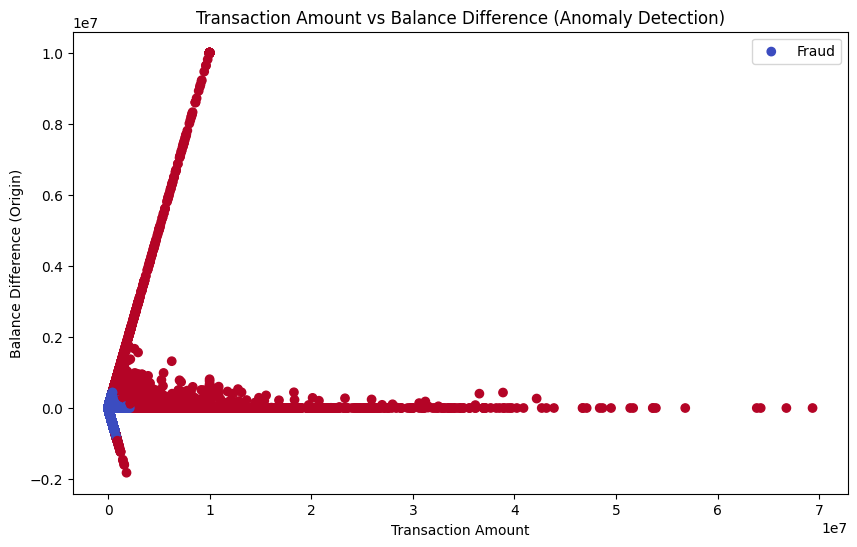

In [ ]:
from sklearn.ensemble import IsolationForest
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Example dataset with transaction features
# df is your dataframe that contains transaction data
# Features: 'amount', 'balanceOrg_diff', 'balanceDest_diff', 'isMerchant', 'type_TRANSFER', 'type_CASH_OUT'

# Train an Isolation Forest model for anomaly detection (fraud detection)
iso_forest = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
iso_forest.fit(X_train)

# Predict anomalies on the test set
y_pred_anomalies = iso_forest.predict(X_test)

# In IsolationForest, -1 indicates anomaly (potential fraud), and 1 indicates normal behavior
# We need to ensure `y_pred_anomalies` is aligned with the DataFrame `df`
# If `df` is the full DataFrame, you should use the same indices for test data
# Create a DataFrame for test data to align with indices
df_test = X_test.copy()
df_test['fraud_alert'] = np.where(y_pred_anomalies == -1, 'Alert: Fraud Suspected', 'No Alert')

# Combine with original DataFrame if needed
df_combined = pd.concat([df, df_test[['fraud_alert']]], axis=1, join='inner')

# View potentially fraudulent transactions
fraud_transactions = df_combined[df_combined['fraud_alert'] == 'Alert: Fraud Suspected']

print("Potential Fraudulent Transactions:")
print(fraud_transactions)

# Visualize fraudulent vs non-fraudulent transactions
plt.figure(figsize=(10, 6))
plt.scatter(df_combined['amount'], df_combined['balanceOrg_diff'], c=(df_combined['fraud_alert'] == 'Alert: Fraud Suspected'), cmap='coolwarm', label='Fraud')
plt.title("Transaction Amount vs Balance Difference (Anomaly Detection)")
plt.xlabel("Transaction Amount")
plt.ylabel("Balance Difference (Origin)")
plt.legend()
plt.show()


In [ ]:
from sklearn.ensemble import IsolationForest
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Example dataset with transaction features
# df is your dataframe that contains transaction data
# Features: 'amount', 'balanceOrg_diff', 'balanceDest_diff', 'isMerchant', 'type_TRANSFER', 'type_CASH_OUT'

# Train an Isolation Forest model for anomaly detection (fraud detection)
iso_forest = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
iso_forest.fit(X_train)

# Predict anomalies on the test set
y_pred_anomalies = iso_forest.predict(X_test)

# In IsolationForest, -1 indicates anomaly (potential fraud), and 1 indicates normal behavior
# We need to ensure `y_pred_anomalies` is aligned with the DataFrame `df`
# If `df` is the full DataFrame, you should use the same indices for test data
# Create a DataFrame for test data to align with indices
df_test = X_test.copy()
df_test['fraud_alert'] = np.where(y_pred_anomalies == -1, 'Alert: Fraud Suspected', 'No Alert')

# Combine with original DataFrame if needed
df_combined = pd.concat([df, df_test[['fraud_alert']]], axis=1, join='inner')

# View potentially fraudulent transactions
fraud_transactions = df_combined[df_combined['fraud_alert'] == 'Alert: Fraud Suspected']

print("Potential Fraudulent Transactions:")
print(fraud_transactions)



Potential Fraudulent Transactions:
         step      type      amount     nameOrig  oldbalanceOrg  \
969         1  TRANSFER  1277212.77  C1334405552     1277212.77   
970         1  CASH_OUT  1277212.77   C467632528     1277212.77   
2462        1  CASH_OUT   282944.06  C1552836537      398655.68   
3163        2  CASH_OUT   963532.14   C430329518      963532.14   
3628        2   CASH_IN   696235.62  C2043889470     4355252.87   
...       ...       ...         ...          ...            ...   
6362508   734  TRANSFER  1810044.85  C1987403065     1810044.85   
6362509   734  CASH_OUT  1810044.85   C491326843     1810044.85   
6362539   736  CASH_OUT  3912252.81  C2015532834     3912252.81   
6362575   740  CASH_OUT  1755647.81  C1724432558     1755647.81   
6362598   742  TRANSFER  4009058.39  C1044665079     4009058.39   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
969                0.00   C431687661            0.00            0.00        1  

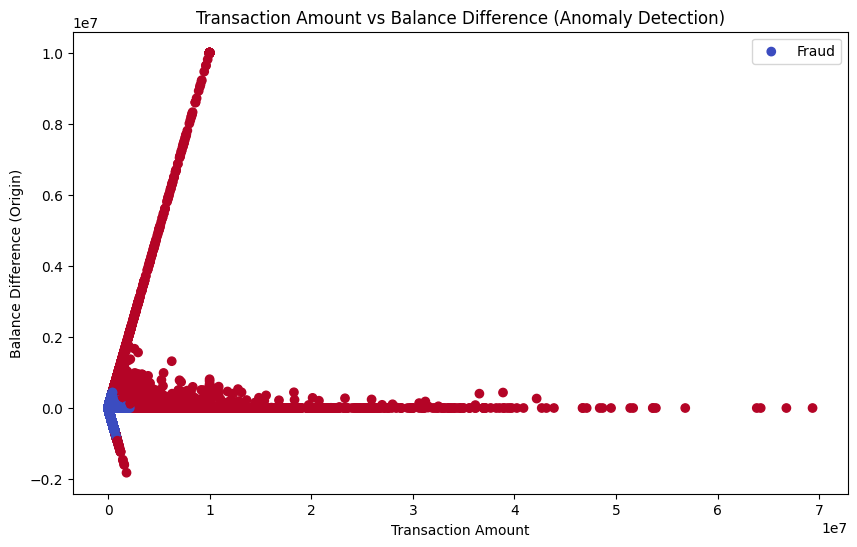

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df_combined['amount'], df_combined['balanceOrg_diff'], c=(df_combined['fraud_alert'] == 'Alert: Fraud Suspected'), cmap='coolwarm', label='Fraud')
plt.title("Transaction Amount vs Balance Difference (Anomaly Detection)")
plt.xlabel("Transaction Amount")
plt.ylabel("Balance Difference (Origin)")
plt.legend()
plt.show()


In [ ]:
df_encoded['isFraud'].value_counts()

,count
isFraud,
0,6354407
1,8213


In [ ]:
# Apply condition to filter rows where 'balanceDest_diff' > 200000
filtered_df = df[df['balanceDest_diff'] > 200000]

# Count the occurrences in the filtered DataFrame
value_counts = filtered_df['balanceDest_diff'].value_counts()

print(value_counts)


balanceDest_diff
10000000.00    136
300832.58        3
339985.11        3
966656.84        3
301579.76        3
              ... 
295505.80        1
227841.94        1
363955.68        1
749934.14        1
850002.52        1
Name: count, Length: 1248845, dtype: int64


In [ ]:
# Apply condition to filter rows where 'balanceDest_diff' > 200000
filtered_df = df[df['balanceDest_diff'] > 200000]

# Count the occurrences in the filtered DataFrame
value_counts = filtered_df['balanceDest_diff']

print(value_counts)


24          2712905.89
48          5800793.91
72           866097.05
83          3071591.09
84         18269024.93
              ...     
6362609      258355.42
6362613     1258818.83
6362615      339682.13
6362617     6311409.27
6362619      850002.52
Name: balanceDest_diff, Length: 1256035, dtype: float64


In [ ]:
# Apply condition to filter rows where 'balanceDest_diff' > 200000
filtered_df = df[df['balanceOrg_diff'] > 200000]

# Count the occurrences in the filtered DataFrame
value_counts = filtered_df['balanceOrg_diff'].value_counts()

print(value_counts)

balanceOrg_diff
10000000.00    262
10000000.00     12
204791.00        5
206124.00        5
206472.00        5
              ... 
201721.43        1
243136.57        1
246738.61        1
213817.00        1
497754.00        1
Name: count, Length: 73773, dtype: int64


In [ ]:
# Apply multiple conditions using bitwise operators and parentheses
filtered_df = df_encoded[(df_encoded['balanceOrg_diff'] > 200000) & (df_encoded['isFraud'] == 1)]
print(filtered_df)



         step      amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
969         1  1277212.77  C1334405552     1277212.77             0.0   
970         1  1277212.77   C467632528     1277212.77             0.0   
2301        1   235238.66  C1872047468      235238.66             0.0   
2302        1   235238.66  C1499825229      235238.66             0.0   
3059        2  1096187.24  C1093223281     1096187.24             0.0   
...       ...         ...          ...            ...             ...   
6362615   743   339682.13   C786484425      339682.13             0.0   
6362616   743  6311409.28  C1529008245     6311409.28             0.0   
6362617   743  6311409.28  C1162922333     6311409.28             0.0   
6362618   743   850002.52  C1685995037      850002.52             0.0   
6362619   743   850002.52  C1280323807      850002.52             0.0   

            nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  \
969       C431687661            0.00      

In [ ]:
# Apply multiple conditions using bitwise operators and parentheses
filtered_df = df_encoded[(df_encoded['balanceDest_diff'] > 200000) & (df_encoded['isFraud'] == 1)]

# Optionally, you can count occurrences or view the filtered DataFrame
print(filtered_df)
filtered_df.shape

         step      amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
724         1   416001.33   C749981943           0.00             0.0   
970         1  1277212.77   C467632528     1277212.77             0.0   
2302        1   235238.66  C1499825229      235238.66             0.0   
3060        2  1096187.24    C77163673     1096187.24             0.0   
3163        2   963532.14   C430329518      963532.14             0.0   
...       ...         ...          ...            ...             ...   
6362609   742   258355.42  C1113162093      258355.42             0.0   
6362613   743  1258818.82  C1436118706     1258818.82             0.0   
6362615   743   339682.13   C786484425      339682.13             0.0   
6362617   743  6311409.28  C1162922333     6311409.28             0.0   
6362619   743   850002.52  C1280323807      850002.52             0.0   

            nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  \
724       C667346055          102.00      

(2749, 17)

In [ ]:
# Apply multiple conditions using bitwise operators and parentheses
filtered_df = df_encoded[(df_encoded['balanceDest_diff'] > 200000) & (df_encoded['isFraud'] == 1)]

# Optionally, you can count occurrences or view the filtered DataFrame
print(filtered_df)
filtered_df.shape

         step      amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
724         1   416001.33   C749981943           0.00             0.0   
970         1  1277212.77   C467632528     1277212.77             0.0   
2302        1   235238.66  C1499825229      235238.66             0.0   
3060        2  1096187.24    C77163673     1096187.24             0.0   
3163        2   963532.14   C430329518      963532.14             0.0   
...       ...         ...          ...            ...             ...   
6362609   742   258355.42  C1113162093      258355.42             0.0   
6362613   743  1258818.82  C1436118706     1258818.82             0.0   
6362615   743   339682.13   C786484425      339682.13             0.0   
6362617   743  6311409.28  C1162922333     6311409.28             0.0   
6362619   743   850002.52  C1280323807      850002.52             0.0   

            nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  \
724       C667346055          102.00      

(2749, 17)

In [ ]:
filtered_df = df_encoded[(df_encoded['type_CASH_OUT'] ==1) & (df_encoded['isFraud'] == 1)]

# Optionally, you can count occurrences or view the filtered DataFrame
print(filtered_df)

         step      amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
3           1      181.00   C840083671         181.00             0.0   
252         1     2806.00  C2101527076        2806.00             0.0   
681         1    20128.00  C1118430673       20128.00             0.0   
724         1   416001.33   C749981943           0.00             0.0   
970         1  1277212.77   C467632528     1277212.77             0.0   
...       ...         ...          ...            ...             ...   
6362611   742    63416.99   C994950684       63416.99             0.0   
6362613   743  1258818.82  C1436118706     1258818.82             0.0   
6362615   743   339682.13   C786484425      339682.13             0.0   
6362617   743  6311409.28  C1162922333     6311409.28             0.0   
6362619   743   850002.52  C1280323807      850002.52             0.0   

            nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  \
3          C38997010        21182.00      

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score

# Assuming you have already trained your model and made predictions
# y_test is the actual test labels
# y_pred is the predicted labels from the model
# y_prob is the predicted probabilities from the model

# Evaluate the basic metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Confusion Matrix to analyze false positives and false negatives
conf_matrix = confusion_matrix(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

# Classification report for detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# False Positive Rate (FPR) calculation
tn, fp, fn, tp = conf_matrix.ravel()  # Extract values from confusion matrix
false_positive_rate = fp / (fp + tn)
print(f"False Positive Rate (FPR): {false_positive_rate:.4f}")


Model Evaluation Metrics:
Accuracy: 0.9993
Precision: 0.9927
Recall: 0.4185
F1-Score: 0.5888
ROC AUC Score: 0.9739
Confusion Matrix:
[[1270899       5]
 [    942     678]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.99      0.42      0.59      1620

    accuracy                           1.00   1272524
   macro avg       1.00      0.71      0.79   1272524
weighted avg       1.00      1.00      1.00   1272524

False Positive Rate (FPR): 0.0000


In [ ]:
v# Simulate previous fraud cases detected
previous_fraud_cases = 200  # example value
current_fraud_cases = (y_test == 1).sum()  # detected by the current system

print(f"Reduction in Fraud Cases: {previous_fraud_cases - current_fraud_cases}")


Reduction in Fraud Cases: -1420


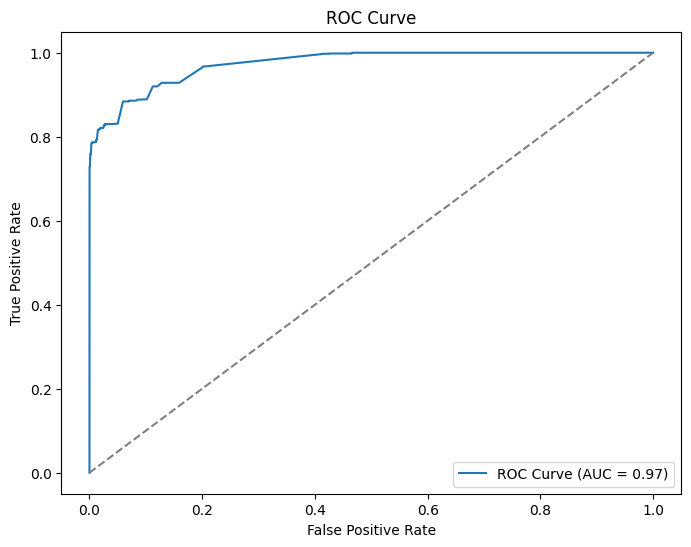

In [ ]:
from sklearn.metrics import roc_curve

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


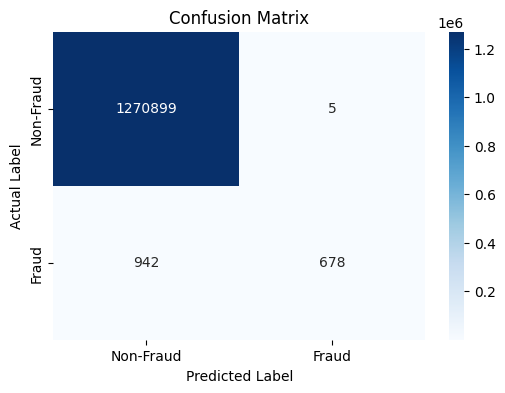

In [ ]:
import seaborn as sns

# Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()
